In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

from classicalfield_orig import FiniteTempGPE as gpe 

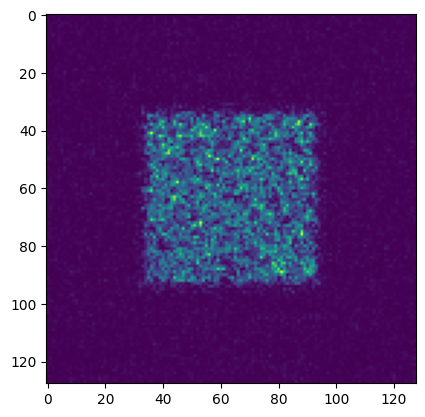

In [109]:
imported_data = np.loadtxt('output.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data)**2)

No vortices to be spawned
Total Imag Time:  1.2902195453643799
kmax:  4.0212385965949355
T:  4.042589962686201


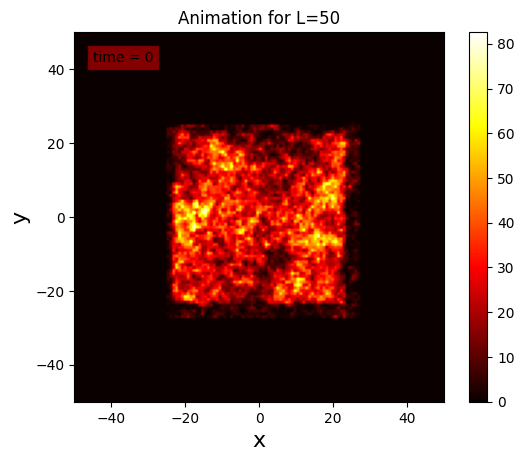

In [110]:
# test out to see if the new potential is good 
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 2250000, dtcoef = 0.0005, boxthickness = 1, Nsamples = 1, runAnim = True, animFileName = 'testparams_thinnerbox_pt2.mp4', Tfact = 1/2, dst = False, imp = True, impPsi = imported_data)

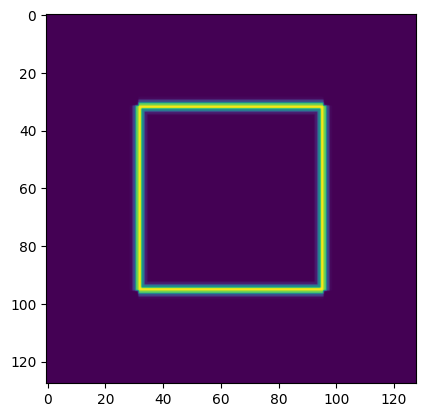

In [111]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)

In [86]:
print(g.gpeobj.dt*3500000)
print(3500000/250)
print(np.shape(g.snaps))
print(9000*250*g.gpeobj.dt)
print(9000*250) 

1068.115234375
14000.0
(9001, 128, 128)
686.6455078125
2250000


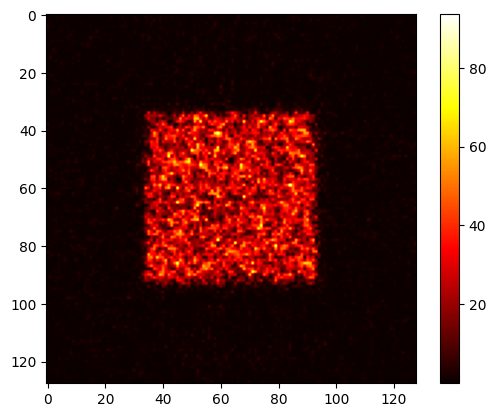

In [104]:
plt.figure() 
plt.imshow(np.abs(g.snaps[7000])**2, cmap = plt.cm.hot)
plt.colorbar() 
#plt.contour(g.gpeobj.Vbox, alpha = 0.09)


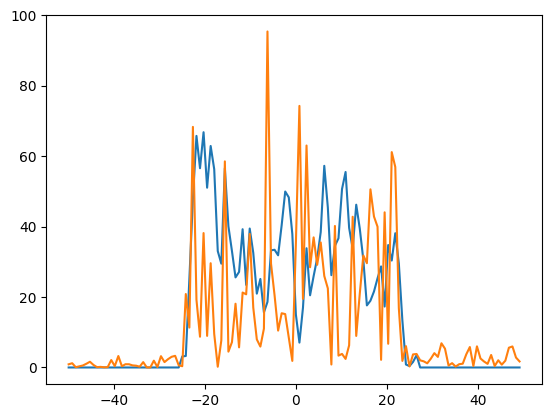

In [112]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2) 
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

In [124]:
print(g.numRealSteps*g.gpeobj.dt+ 4500*250*g.gpeobj.dt)
print(np.shape(g.snaps))

1029.96826171875
(9001, 128, 128)


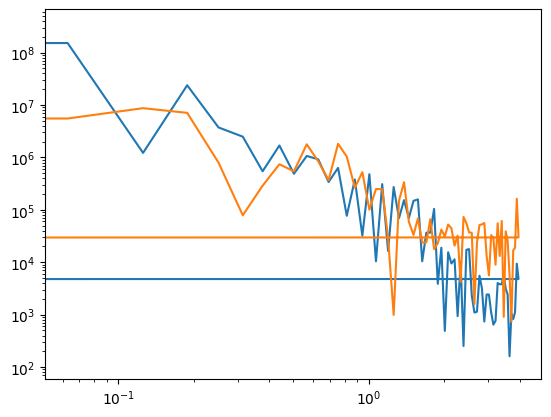

In [131]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2) 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[4500])[0])**2)
plt.yscale('log')
plt.xscale('log')

Trying a higher potential well 


In [ ]:
# test out to see if the new potential is good 
g_2 = gpe(npoints = 2**7, numImagSteps = 2000, numRealSteps = 5000000, dtcoef = 0.0005, boxthickness = 1, Nsamples = 1, runAnim = True, animFileName = 'testparams_higherenergy.mp4', Tfact = 1/2, dst = False)

No vortices to be spawned
Total Imag Time:  7.288426637649536
kmax:  8.042477193189871
T:  16.170359850744806


MISC

In [108]:
# export file 
output = np.savetxt('output.csv', g.snaps[-1])

In [24]:
print(len(g.snaps))

4001


In [107]:
# get the energies and stats

print("Temperature: ", g.T) 
print("Kinetic Energy: ", g.gpeobj.kmax**2/2)
print("Potential Energy: ", np.max(g.gpeobj.Vbox))
print("Interaction Energy: ", g.gpeobj.g*np.max(np.abs(g.gs)**2))
print("Total Time: ", g.numRealSteps*g.gpeobj.dt) 
print("Time Step: ", g.gpeobj.dt)
print("Number of Atoms: ", g.gpeobj.Natoms) 

Temperature:  4.042589962686201
Kinetic Energy:  8.085179925372403
Potential Energy:  7.832554355150511
Interaction Energy:  1.1803369428558095
Total Time:  686.6455078125
Time Step:  0.00030517578125
Number of Atoms:  64000


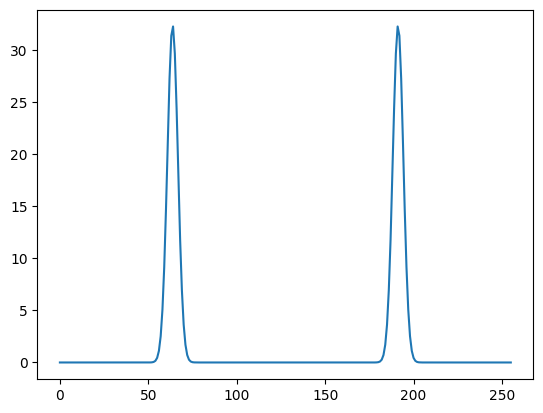

In [6]:
plt.figure() 
plt.plot(g.gpeobj.Vbox[len(g.gpeobj.Vbox)//2])
#plt.colorbar() 
plt.show() 

In [9]:
print(g.gpeobj.Vbox.nbytes)

NameError: name 'g' is not defined

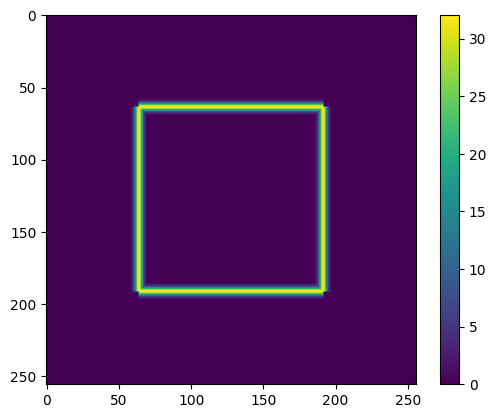

In [4]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)
plt.colorbar() 

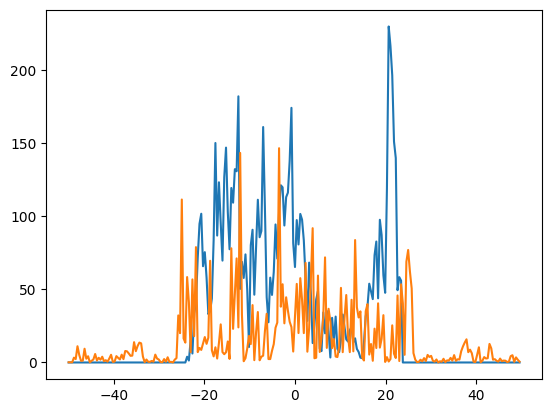

In [8]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

In [9]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift

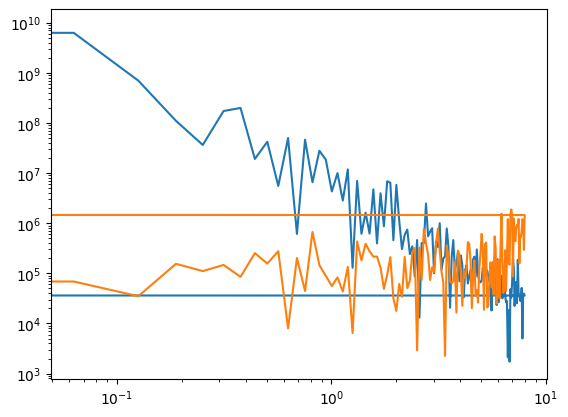

In [14]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.yscale('log')
plt.xscale('log')

In [7]:
print(100/g.gpeobj.dt)

1310720.0


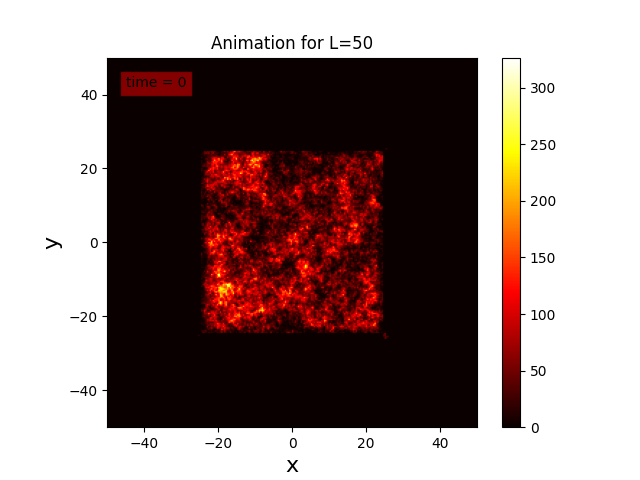

In [3]:
%matplotlib widget 
g.animatepsi2d('test_box.mp4')